# Classify different data sets

### Basic includes

In [2]:
# Using pandas to load the csv file
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt

from keras import models 
from keras import layers 
from keras import callbacks
from keras.utils import to_categorical

# reuters and fashin mnist data set from keras
from keras.datasets import reuters
from keras.datasets import fashion_mnist

# needed to preprocess text
from keras.preprocessing.text import Tokenizer

Using TensorFlow backend.


### Classify the Fashion Mnist

---

Size of train inputs:  (60000, 28, 28)
Size of test inputs:  (10000, 28, 28)
Classify into  10  labels :  {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
Labels: 
0 T-shirt/top
1 Trouser
2 Pullover
3 Dress
4 Coat
5 Sandal
6 Shirt
7 Sneaker
8 Bag
9 Ankle boot 


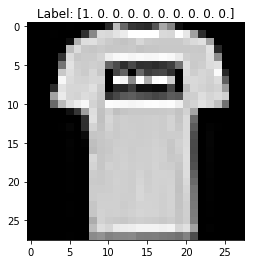

In [2]:
(fashion_train_data, fashion_train_labels), (fashion_test_data, fashion_test_labels) = fashion_mnist.load_data()

#keep  image  1 without modifying
test_index = 1
test_image = fashion_train_data[test_index]


#classify 6000 images of 28*28
print("Size of train inputs: ",fashion_train_data.shape)
print("Size of test inputs: ",fashion_test_data.shape)

#number of labels to clasify = 10
print("Classify into ",len(set(fashion_train_labels))," labels : ",set(fashion_train_labels))
print("""Labels: 
0 T-shirt/top
1 Trouser
2 Pullover
3 Dress
4 Coat
5 Sandal
6 Shirt
7 Sneaker
8 Bag
9 Ankle boot """)

#normalize
#aplastar la imagen de  6000*28*28 a 60000*728
#estandarizar valores dividir entre 255 para obtener valores entre 0 y 1
fashion_train_data = fashion_train_data.reshape((60000, 28 * 28))
fashion_train_data = fashion_train_data.astype('float32') / 255 
fashion_test_data = fashion_test_data.reshape((10000, 28 * 28))
fashion_test_data = fashion_test_data.astype('float32') / 255 

#one hot encoding los labels
fashion_train_labels = to_categorical(fashion_train_labels)
fashion_test_labels = to_categorical(fashion_test_labels)



#generar set de validacion con 20%
# fashion_validation_data = fashion_train_data[:int(60000*0.2)] #(sino pongo int()el resultado es 12000.0)
# fashion_validation_labels = fashion_train_labels[:int(60000*0.2)]
#quitar el set de validacion del train set
# fashion_train_data = fashion_train_data[int(60000*0.8):]
# fashion_train_labels = fashion_train_labels[int(60000*0.8):]


#show image 1
test_index = 1

plt.title("Label: " + str(fashion_train_labels[test_index]))
plt.imshow(test_image, cmap="gray")




In [3]:

# The keras.models.Sequential class is a wrapper for the neural network model that treats 
# the network as a sequence of layers
network = models.Sequential()

# Dense layers: fully connected layers
network.add(layers.Dense(360, activation='relu', input_shape=(28 * 28,))) 
network.add(layers.Dropout(0.1))
network.add(layers.Dense(192, activation='relu'))
network.add(layers.Dropout(0.1))
network.add(layers.Dense(96, activation='relu'))
network.add(layers.Dropout(0.1))
network.add(layers.Dense(32, activation='relu'))
network.add(layers.Dropout(0.1))
network.add(layers.Dense(10, activation='softmax'))

early_stop = callbacks.EarlyStopping(monitor='val_loss',patience=5)

network.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['categorical_accuracy'])
#sgd = stocastic gradient descent
#loss  = funciones de error

network.summary()
#two ways to do the validation
#validation_data=(fashion_validation_data,fashion_validation_labels)
#validation_split=0.2,
history = network.fit(fashion_train_data, fashion_train_labels, batch_size = 128, validation_split=0.2, epochs=50, verbose=2)

test_loss, test_acc = network.evaluate(fashion_test_data, fashion_test_labels)

print("test loss: ", test_loss, "test accuracy: ", test_acc)





_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 360)               282600    
_________________________________________________________________
dropout_1 (Dropout)          (None, 360)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 192)               69312     
_________________________________________________________________
dropout_2 (Dropout)          (None, 192)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 96)                18528     
_________________________________________________________________
dropout_3 (Dropout)          (None, 96)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 32)                3104      
__________

dict_keys(['val_loss', 'val_categorical_accuracy', 'loss', 'categorical_accuracy'])


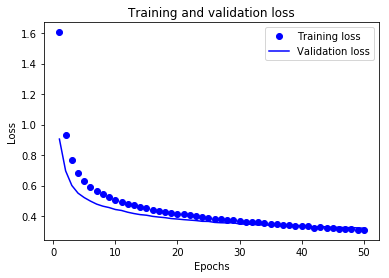

In [4]:

# Plot of the validation and training loss

# This dictionary stores the validation and accuracy of the model throughout the epochs
history_dict = history.history
# The history values are split in different lists for ease of plotting
print(history_dict.keys())
acc = history_dict['categorical_accuracy']
val_acc = history_dict['val_categorical_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)
# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


#### TO DO: Preprocess the data

1. Normalize the input data set
2. Perform one hot encoding
3. Create a train, test, and validation set




#### TO DO: Define and train a network, then plot the accuracy of the training, validation, and testing

1. Use a validation set
2. Propose and train a network
3. Print the history of the training
4. Evaluate with a test set

## Classifying newswires

---

Build a network to classify Reuters newswires into 46 different mutually-exclusive topics.

### Load and review the data

In [5]:
(reuters_train_data, reuters_train_labels), (reuters_test_data, reuters_test_labels) = reuters.load_data(num_words=10000)

print(reuters_train_data.shape)
print(reuters_train_labels.shape)
print(reuters_train_data[1])
print(reuters_train_labels[5])

print(set(reuters_train_labels))

(8982,)
(8982,)
[1, 3267, 699, 3434, 2295, 56, 2, 7511, 9, 56, 3906, 1073, 81, 5, 1198, 57, 366, 737, 132, 20, 4093, 7, 2, 49, 2295, 2, 1037, 3267, 699, 3434, 8, 7, 10, 241, 16, 855, 129, 231, 783, 5, 4, 587, 2295, 2, 2, 775, 7, 48, 34, 191, 44, 35, 1795, 505, 17, 12]
4
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45}


Load the word index to decode the train data.

In [6]:
word_index = reuters.get_word_index()

reverse_index = dict([(value+3, key) for (key, value) in word_index.items()])

reverse_index[0] = "<PAD>"
reverse_index[1] = "<START>"
reverse_index[2] = "<UNKNOWN>"  # unknown
reverse_index[3] = "<UNUSED>"

decoded_review = ' '.join([reverse_index.get(i,'?') for i in reuters_train_data[0]])

print(decoded_review)

<START> <UNKNOWN> <UNKNOWN> said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3


In [7]:
#normalize
print(reuters_test_data[0])
# Turning the output into vector mode, each of length 10000
tokenizer = Tokenizer(num_words=10000)
reuters_train_data_token = tokenizer.sequences_to_matrix(reuters_train_data, mode='binary')
reuters_test_data_token = tokenizer.sequences_to_matrix(reuters_test_data, mode='binary')
# print("-----")
# print(reuters_test_data_token[0])
# print("-----")
print(reuters_train_data_token.shape)
print(reuters_test_data_token.shape)

# One-hot encoding of the labels
num_classes = 46
reuters_one_hot_train_labels = to_categorical(reuters_train_labels, num_classes)
reuters_one_hot_test_labels = to_categorical(reuters_test_labels, num_classes)
print(reuters_one_hot_train_labels.shape)
print(reuters_one_hot_test_labels.shape)




[1, 4, 1378, 2025, 9, 697, 4622, 111, 8, 25, 109, 29, 3650, 11, 150, 244, 364, 33, 30, 30, 1398, 333, 6, 2, 159, 9, 1084, 363, 13, 2, 71, 9, 2, 71, 117, 4, 225, 78, 206, 10, 9, 1214, 8, 4, 270, 5, 2, 7, 748, 48, 9, 2, 7, 207, 1451, 966, 1864, 793, 97, 133, 336, 7, 4, 493, 98, 273, 104, 284, 25, 39, 338, 22, 905, 220, 3465, 644, 59, 20, 6, 119, 61, 11, 15, 58, 579, 26, 10, 67, 7, 4, 738, 98, 43, 88, 333, 722, 12, 20, 6, 19, 746, 35, 15, 10, 9, 1214, 855, 129, 783, 21, 4, 2280, 244, 364, 51, 16, 299, 452, 16, 515, 4, 99, 29, 5, 4, 364, 281, 48, 10, 9, 1214, 23, 644, 47, 20, 324, 27, 56, 2, 2, 5, 192, 510, 17, 12]
(8982, 10000)
(2246, 10000)
(8982, 46)
(2246, 46)


In [8]:
# the network as a sequence of layers
network2 = models.Sequential()

# Dense layers: fully connected layers
network2.add(layers.Dense(3600, activation='relu', input_dim=(10000))) 
network2.add(layers.Dropout(0.1))
network2.add(layers.Dense(1600, activation='relu'))
network2.add(layers.Dropout(0.1))
network2.add(layers.Dense(720, activation='relu'))
network2.add(layers.Dropout(0.1))
network2.add(layers.Dense(128, activation='relu'))
network2.add(layers.Dropout(0.1))
network2.add(layers.Dense(46, activation='softmax'))

early_stop = callbacks.EarlyStopping(monitor='val_loss',patience=5)

network2.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

network.summary()

#validation_split=0.2,
history = network2.fit(reuters_train_data_token, reuters_one_hot_train_labels, batch_size = 128, validation_split=0.15, epochs=50, verbose=2)

test_loss, test_acc = network2.evaluate(reuters_test_data_token, reuters_one_hot_test_labels)

print("test loss: ", test_loss, "test accuracy: ", test_acc)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 360)               282600    
_________________________________________________________________
dropout_1 (Dropout)          (None, 360)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 192)               69312     
_________________________________________________________________
dropout_2 (Dropout)          (None, 192)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 96)                18528     
_________________________________________________________________
dropout_3 (Dropout)          (None, 96)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 32)                3104      
__________

KeyboardInterrupt: 

In [ ]:


history_dict = history.history
# The history values are split in different lists for ease of plotting
acc = history_dict['categorical_accuracy']
val_acc = history_dict['val_categorical_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)
# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


#### TO DO: Preprocess the data

1. Normalize the input data set
2. Perform one hot encoding
3. Create a train, test, and validation set

#### TO DO: Define and train a network, then plot the accuracy of the training, validation, and testing

1. Use a validation set
2. Propose and train a network
3. Print the history of the training
4. Evaluate with a test set

## Predicting Student Admissions

---

Predict student admissions based on three pieces of data:

- GRE Scores
- GPA Scores
- Class rank

### Load and visualize the data

In [16]:
student_data = pd.read_csv("student_data.csv")
print(student_data)

     admit  gre   gpa  rank
0        0  380  3.61     3
1        1  660  3.67     3
2        1  800  4.00     1
3        1  640  3.19     4
4        0  520  2.93     4
5        1  760  3.00     2
6        1  560  2.98     1
7        0  400  3.08     2
8        1  540  3.39     3
9        0  700  3.92     2
10       0  800  4.00     4
11       0  440  3.22     1
12       1  760  4.00     1
13       0  700  3.08     2
14       1  700  4.00     1
15       0  480  3.44     3
16       0  780  3.87     4
17       0  360  2.56     3
18       0  800  3.75     2
19       1  540  3.81     1
20       0  500  3.17     3
21       1  660  3.63     2
22       0  600  2.82     4
23       0  680  3.19     4
24       1  760  3.35     2
25       1  800  3.66     1
26       1  620  3.61     1
27       1  520  3.74     4
28       1  780  3.22     2
29       0  520  3.29     1
..     ...  ...   ...   ...
367      1  540  3.77     2
368      1  680  3.76     3
369      1  680  2.42     1
370      1  620  3.3

Plot of the GRE and the GPA from the data.

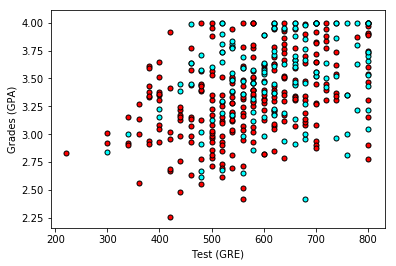

In [17]:
X = np.array(student_data[["gre","gpa"]])
y = np.array(student_data["admit"])
admitted = X[np.argwhere(y==1)]
rejected = X[np.argwhere(y==0)]
plt.scatter([s[0][0] for s in rejected], [s[0][1] for s in rejected], s = 25, color = 'red', edgecolor = 'k')
plt.scatter([s[0][0] for s in admitted], [s[0][1] for s in admitted], s = 25, color = 'cyan', edgecolor = 'k')
plt.xlabel('Test (GRE)')
plt.ylabel('Grades (GPA)')

plt.show()

Plot of the data by class rank.

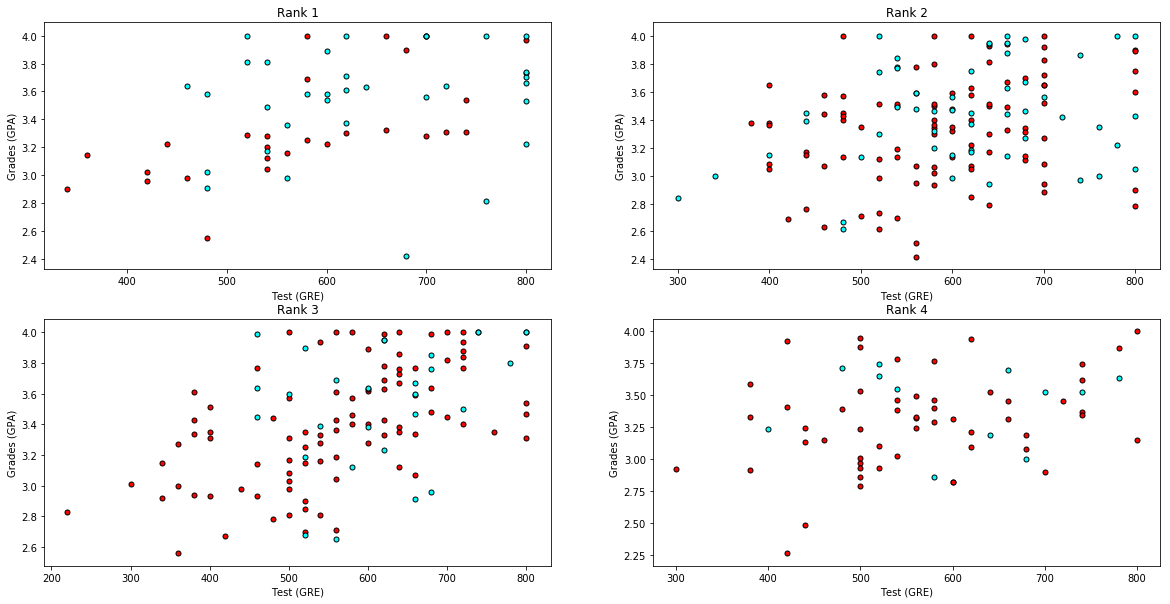

In [19]:
f, plots = plt.subplots(2, 2, figsize=(20,10))
plots = [plot for sublist in plots for plot in sublist]

for idx, plot in enumerate(plots):
    data_rank = student_data[student_data["rank"]==idx+1]
    plot.set_title("Rank " + str(idx+1))
    X = np.array(data_rank[["gre","gpa"]])
    y = np.array(data_rank["admit"])
    admitted = X[np.argwhere(y==1)]
    rejected = X[np.argwhere(y==0)]
    plot.scatter([s[0][0] for s in rejected], [s[0][1] for s in rejected], s = 25, color = 'red', edgecolor = 'k')
    plot.scatter([s[0][0] for s in admitted], [s[0][1] for s in admitted], s = 25, color = 'cyan', edgecolor = 'k')
    plot.set_xlabel('Test (GRE)')
    plot.set_ylabel('Grades (GPA)')
    

In [15]:
#convert the data to np arrays
gpa = np.array(student_data["gpa"])
gre = np.array(student_data["gre"])

#get the mean and std deviation of gpa and gre
gpa_mean = np.average(gpa)
gre_mean = np.average(gre)

gpa_std = np.std(gpa)
gre_std = np.std(gre)

#check the values
print("GPA mean: ",gpa_mean, " GRE mean: ",gre_mean)
print("GPA std: ",gpa_std, " GRE std: ",gre_std)

#standarize the input with the mean and std
student_data["gpa"]-=gpa_mean
student_data["gpa"]/=gpa_std

student_data["gre"]-=gre_mean
student_data["gre"]/=gpa_mean


#make the rank categorical
rank = np.array(student_data["rank"]-1) #-1 makes them 0-3 instead of 1-4
rank = to_categorical(rank)

#create array for the data
data = np.zeros((student_data.shape[0],6))
data[:,0] = np.array(student_data["gre"])
data[:,1] = np.array(student_data["gpa"])
data[:,2:6] = rank

#get the labels from the admitted value
student_labels = np.array(student_data["admit"])

#create a training and validation set
#there are 397 complete students,
#validation = 80, training =317
student_train_data = data [:317]
student_train_labels = to_categorical(student_labels[:317])

student_test_data = data[317:]
student_test_labels = to_categorical(student_labels[317:])


print (student_train_data.shape)
print (student_train_labels.shape)
print (student_test_data.shape)
print (student_test_labels.shape)


GPA mean:  -6.711675715618075e-18  GRE mean:  -9.650475698147914e+50
GPA std:  1.0  GRE std:  1.6015570125888907e+68
(317, 6)
(317, 2)
(80, 6)
(80, 2)


In [25]:
#create the model

# the network as a sequence of layers
network3 = models.Sequential()

# Dense layers: fully connected layers
network3.add(layers.Dense(200, activation='relu', input_dim=(6))) 
network3.add(layers.Dropout(0.1))
network3.add(layers.Dense(90, activation='relu'))
network3.add(layers.Dropout(0.1))
network3.add(layers.Dense(30, activation='relu'))
network3.add(layers.Dropout(0.1))
network3.add(layers.Dense(2, activation='relu'))

early_stop = callbacks.EarlyStopping(monitor='val_loss',patience=5)

network3.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

network3.summary()

#validation_split=0.2,
history = network3.fit(student_train_data ,student_train_labels, validation_split=0.15, epochs=50, verbose=2)

test_loss, test_acc = network3.evaluate(student_test_data, student_test_labels)

print("test loss: ", test_loss, "test accuracy: ", test_acc)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_39 (Dense)             (None, 200)               1400      
_________________________________________________________________
dropout_31 (Dropout)         (None, 200)               0         
_________________________________________________________________
dense_40 (Dense)             (None, 90)                18090     
_________________________________________________________________
dropout_32 (Dropout)         (None, 90)                0         
_________________________________________________________________
dense_41 (Dense)             (None, 30)                2730      
_________________________________________________________________
dropout_33 (Dropout)         (None, 30)                0         
_________________________________________________________________
dense_42 (Dense)             (None, 2)                 62        
Total para

#### TO DO: Preprocess the data

1. Normalize the input data set
2. Perform one hot encoding
3. Create a train, test, and validation set

#### TO DO: Define and train a network, then plot the accuracy of the training, validation, and testing

1. Use a validation set
2. Propose and train a network
3. Print the history of the training
4. Evaluate with a test set